In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


In [4]:
# Separando as colunas em numéricas e categóricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()

In [5]:
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove('Id_do_imovel')
object_cols.remove('Endereco_Municipio')
object_cols.remove('geometry')

In [6]:
# Vamos assegurar que 'Preco' está na lista de colunas numéricas
if 'Preco' not in numeric_cols:
    raise ValueError("'Preco' não encontrado nas colunas numéricas. Verifique os dados e tente novamente.")
    
numeric_cols.remove('Preco')  # Removendo a coluna 'Preco' dos dados de entrada
numeric_cols.remove('Preco_por_metro_quadrado') # Removendo a coluna 'Preco_por_metro_quadrado' dos dados de entrada

In [7]:
# Separamos o dataframe em features (X) e target (y)
X = df_final[numeric_cols + object_cols]
y = df_final['Preco']

In [11]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [12]:
X_test.count()

Valor_Area_util_do_imovel                         1269
Numero_Andar_do_imovel                            1269
Latitude_imovel                                   1269
Longitude_imovel                                  1269
Tipo_de_Construcao                                1269
Numero_de_Banheiros                               1269
Possui_Jardim                                     1269
Possui_Elevador                                   1269
Possui_Estacionamento                             1269
Possui_Piscina                                    1269
Possui_Terraco                                    1269
Numero_de_Quartos                                 1269
Indicador_Anuncio_possui_planta_baixa             1269
Numero_de_fotos_do_anuncio                        1269
Numero_de_videos_do_anuncio                       1269
Tipo_de_Operacao                                  1269
Tipo_de_proprietario                              1269
Numero_Faixa_Etaria_0-14                          1269
Numero_Fai

Feature Engineering


In [13]:
!pip install feature-engine

In [21]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.1/1.3 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.6 MB/s eta 0:00:00


In [23]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/70.9 MB 2.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/70.9 MB 4.8 MB/s eta 0:00:15
   ---------------------------------------- 0.6/70.9 MB 4.9 MB/s eta 0:00:15
    --------------------------------------- 1.0/70.9 MB 6.0 MB/s eta 0:00:12
    --------------------------------------- 1.3/70.9 MB 5.9 MB/s eta 0:00:12
    --------------------------------------- 1.7/70.9 MB 6.7 MB/s eta 0:00:11
   - -------------------------------------- 2.1/70.9 MB 7.1 MB/s eta 0:00:10
   - -------------------------------------- 2.6/70.9 MB 7.4 MB/s eta 0:00:10
   - -------------------------------------- 3.0/70.9 MB 7.7 MB/s eta 0:00:09
   -- --------------------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\johns\AppData\Local\Programs\Python\Python310\lib\tempfile.py", line 483, in func_wrapper
    return func(*args, **kwargs)
OSError: [Errno 28] No space left on device

During handling of the above exception, anothe

In [16]:
!pip install catboost

     ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
     ---------------------------------------- 0.1/101.0 MB 4.3 MB/s eta 0:00:24
     ---------------------------------------- 0.4/101.0 MB 5.4 MB/s eta 0:00:19
     ---------------------------------------- 0.8/101.0 MB 6.0 MB/s eta 0:00:17
     ---------------------------------------- 1.1/101.0 MB 6.3 MB/s eta 0:00:16
      --------------------------------------- 1.5/101.0 MB 6.7 MB/s eta 0:00:15
      --------------------------------------- 1.9/101.0 MB 7.0 MB/s eta 0:00:15
      --------------------------------------- 2.3/101.0 MB 7.3 MB/s eta 0:00:14
     - -------------------------------------- 2.7/101.0 MB 7.6 MB/s eta 0:00:13
     - -------------------------------------- 3.3/101.0 MB 8.0 MB/s eta 0:00:13
     - -------------------------------------- 3.7/101.0 MB 8.3 MB/s eta 0:00:12
     - -------------------------------------- 4.3/101.0 MB 8.7 MB/s eta 0:00:12
     - -------------------------------------- 5

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder

In [15]:

# pipeline para modelos baseados em árvores
data_tree_pipe = Pipeline(steps=[
                ('numeric_imputer', ArbitraryNumberImputer(variables=numeric_cols, arbitrary_number=-999)),
                ('categoric_imputer', CategoricalImputer(variables=object_cols, imputation_method='missing', fill_value='missing')),
                ('one_hot_encoder', OneHotEncoder(variables=object_cols))
])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = [
          ('decision_tree', DecisionTreeRegressor()),
          ('random_forest', RandomForestRegressor()),
          ('lgbm', LGBMRegressor()),
          ('xgb', XGBRegressor()),
          ('catboost', CatBoostRegressor())
]

In [29]:

from sklearn.model_selection import KFold, cross_validate

# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metricas = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
dicionario_resultados = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

In [30]:
# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_tree_pipe.steps + [model])
    
    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metricas, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)
    
    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])
    
    # populando a tabela com os resultados da regressão logística
    dicionario_resultados['model'].append(model_pipe.steps[-1][0])
    dicionario_resultados['r2'].append(r2)
    dicionario_resultados['mae'].append(mae)
    dicionario_resultados['rmse'].append(rmse)

df_resultados = pd.DataFrame(dicionario_resultados)

In [31]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_resultados.sort_values(by='mae')

,model,r2,mae,rmse
4,catboost,0.76,139.52,190.53
2,lgbm,0.76,140.16,191.49
1,random_forest,0.74,144.13,198.23
3,xgb,0.74,144.22,197.53
0,decision_tree,0.51,194.41,273.95


# Visualizando as Predições do Catboost

In [32]:

best_model = Pipeline(steps=data_tree_pipe.steps + [('catboost', CatBoostRegressor())])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test) 

Learning rate set to 0.052917
0:	learn: 380.5154598	total: 140ms	remaining: 2m 20s
1:	learn: 369.6202093	total: 143ms	remaining: 1m 11s
2:	learn: 359.9347927	total: 145ms	remaining: 48.3s
3:	learn: 350.1613769	total: 147ms	remaining: 36.6s
4:	learn: 341.3023549	total: 149ms	remaining: 29.6s
5:	learn: 332.6707373	total: 151ms	remaining: 25s
6:	learn: 324.8224358	total: 153ms	remaining: 21.7s
7:	learn: 317.2291200	total: 155ms	remaining: 19.2s
8:	learn: 310.2733698	total: 157ms	remaining: 17.3s
9:	learn: 303.8592736	total: 159ms	remaining: 15.7s
10:	learn: 297.6441851	total: 161ms	remaining: 14.5s
11:	learn: 292.0776782	total: 163ms	remaining: 13.4s
12:	learn: 286.6673021	total: 165ms	remaining: 12.6s
13:	learn: 281.9595350	total: 167ms	remaining: 11.8s
14:	learn: 278.1711295	total: 169ms	remaining: 11.1s
15:	learn: 274.0091289	total: 171ms	remaining: 10.5s
16:	learn: 270.1897692	total: 173ms	remaining: 10s
17:	learn: 266.5447837	total: 175ms	remaining: 9.54s
18:	learn: 263.5654869	total

216:	learn: 179.0531009	total: 586ms	remaining: 2.12s
217:	learn: 178.9002038	total: 589ms	remaining: 2.11s
218:	learn: 178.7777448	total: 591ms	remaining: 2.11s
219:	learn: 178.6034940	total: 593ms	remaining: 2.1s
220:	learn: 178.3860627	total: 595ms	remaining: 2.1s
221:	learn: 178.2207325	total: 597ms	remaining: 2.09s
222:	learn: 178.0927034	total: 600ms	remaining: 2.09s
223:	learn: 177.9797417	total: 602ms	remaining: 2.08s
224:	learn: 177.7810682	total: 604ms	remaining: 2.08s
225:	learn: 177.6512118	total: 606ms	remaining: 2.07s
226:	learn: 177.4670252	total: 608ms	remaining: 2.07s
227:	learn: 177.3049854	total: 610ms	remaining: 2.06s
228:	learn: 177.2160619	total: 612ms	remaining: 2.06s
229:	learn: 177.0964459	total: 614ms	remaining: 2.06s
230:	learn: 176.9694068	total: 616ms	remaining: 2.05s
231:	learn: 176.7299896	total: 618ms	remaining: 2.04s
232:	learn: 176.5611614	total: 620ms	remaining: 2.04s
233:	learn: 176.4575485	total: 622ms	remaining: 2.04s
234:	learn: 176.3480499	total:

397:	learn: 160.4887180	total: 978ms	remaining: 1.48s
398:	learn: 160.4072640	total: 981ms	remaining: 1.48s
399:	learn: 160.3494970	total: 983ms	remaining: 1.47s
400:	learn: 160.3099211	total: 985ms	remaining: 1.47s
401:	learn: 160.2115293	total: 987ms	remaining: 1.47s
402:	learn: 160.1483332	total: 989ms	remaining: 1.46s
403:	learn: 160.0817608	total: 991ms	remaining: 1.46s
404:	learn: 160.0517218	total: 993ms	remaining: 1.46s
405:	learn: 160.0155597	total: 995ms	remaining: 1.46s
406:	learn: 159.9240594	total: 997ms	remaining: 1.45s
407:	learn: 159.8359661	total: 999ms	remaining: 1.45s
408:	learn: 159.7554854	total: 1s	remaining: 1.45s
409:	learn: 159.6924171	total: 1s	remaining: 1.44s
410:	learn: 159.5939575	total: 1s	remaining: 1.44s
411:	learn: 159.4976286	total: 1.01s	remaining: 1.44s
412:	learn: 159.3880016	total: 1.01s	remaining: 1.44s
413:	learn: 159.3111277	total: 1.01s	remaining: 1.43s
414:	learn: 159.2275356	total: 1.01s	remaining: 1.43s
415:	learn: 159.1381783	total: 1.02s	

562:	learn: 149.6510591	total: 1.37s	remaining: 1.06s
563:	learn: 149.6165815	total: 1.37s	remaining: 1.06s
564:	learn: 149.5406096	total: 1.37s	remaining: 1.06s
565:	learn: 149.4834002	total: 1.38s	remaining: 1.05s
566:	learn: 149.4313114	total: 1.38s	remaining: 1.05s
567:	learn: 149.4044762	total: 1.38s	remaining: 1.05s
568:	learn: 149.3730420	total: 1.38s	remaining: 1.05s
569:	learn: 149.2936131	total: 1.39s	remaining: 1.04s
570:	learn: 149.2490793	total: 1.39s	remaining: 1.04s
571:	learn: 149.1684258	total: 1.39s	remaining: 1.04s
572:	learn: 149.1149540	total: 1.39s	remaining: 1.04s
573:	learn: 149.0791988	total: 1.39s	remaining: 1.03s
574:	learn: 149.0110877	total: 1.4s	remaining: 1.03s
575:	learn: 148.9288198	total: 1.4s	remaining: 1.03s
576:	learn: 148.9069070	total: 1.4s	remaining: 1.03s
577:	learn: 148.8315124	total: 1.4s	remaining: 1.02s
578:	learn: 148.8146925	total: 1.4s	remaining: 1.02s
579:	learn: 148.7766838	total: 1.41s	remaining: 1.02s
580:	learn: 148.6895233	total: 1.

756:	learn: 139.4955911	total: 1.76s	remaining: 566ms
757:	learn: 139.4502800	total: 1.76s	remaining: 564ms
758:	learn: 139.3938005	total: 1.77s	remaining: 561ms
759:	learn: 139.3028526	total: 1.77s	remaining: 559ms
760:	learn: 139.2913348	total: 1.77s	remaining: 556ms
761:	learn: 139.2572185	total: 1.77s	remaining: 554ms
762:	learn: 139.2176877	total: 1.77s	remaining: 552ms
763:	learn: 139.1747669	total: 1.78s	remaining: 549ms
764:	learn: 139.1336426	total: 1.78s	remaining: 547ms
765:	learn: 139.0766337	total: 1.78s	remaining: 544ms
766:	learn: 139.0486379	total: 1.78s	remaining: 542ms
767:	learn: 138.9860060	total: 1.79s	remaining: 540ms
768:	learn: 138.9435885	total: 1.79s	remaining: 537ms
769:	learn: 138.9150503	total: 1.79s	remaining: 535ms
770:	learn: 138.8462209	total: 1.79s	remaining: 532ms
771:	learn: 138.7780818	total: 1.79s	remaining: 530ms
772:	learn: 138.7539186	total: 1.8s	remaining: 527ms
773:	learn: 138.7218239	total: 1.8s	remaining: 525ms
774:	learn: 138.6740551	total:

941:	learn: 131.2867230	total: 2.15s	remaining: 133ms
942:	learn: 131.2511789	total: 2.16s	remaining: 130ms
943:	learn: 131.2345021	total: 2.16s	remaining: 128ms
944:	learn: 131.2006176	total: 2.16s	remaining: 126ms
945:	learn: 131.1777762	total: 2.16s	remaining: 123ms
946:	learn: 131.1469325	total: 2.17s	remaining: 121ms
947:	learn: 131.0959199	total: 2.17s	remaining: 119ms
948:	learn: 131.0535252	total: 2.17s	remaining: 117ms
949:	learn: 131.0283225	total: 2.17s	remaining: 114ms
950:	learn: 130.9934545	total: 2.17s	remaining: 112ms
951:	learn: 130.9447353	total: 2.18s	remaining: 110ms
952:	learn: 130.8849606	total: 2.18s	remaining: 107ms
953:	learn: 130.8229691	total: 2.18s	remaining: 105ms
954:	learn: 130.7978659	total: 2.18s	remaining: 103ms
955:	learn: 130.7422582	total: 2.18s	remaining: 101ms
956:	learn: 130.6849985	total: 2.19s	remaining: 98.2ms
957:	learn: 130.6223064	total: 2.19s	remaining: 95.9ms
958:	learn: 130.5955033	total: 2.19s	remaining: 93.7ms
959:	learn: 130.5198084	t

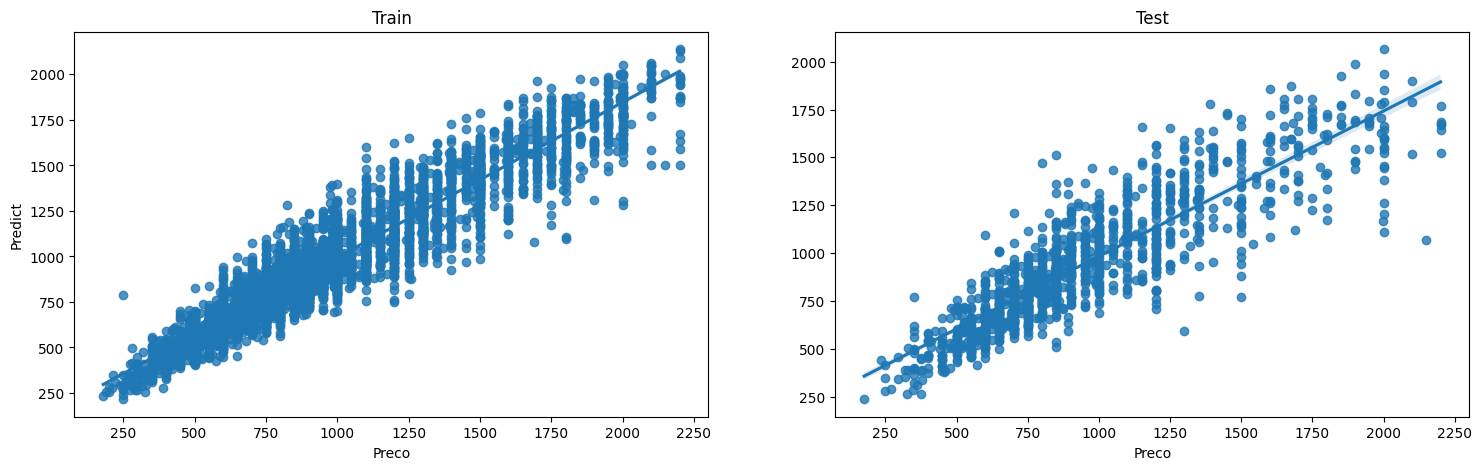

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [34]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 = {r2}")
print(f"MAE = {mae}")
print(f"RMSE = {rmse}")

R2 = 0.7716001269436052
MAE = 133.347905166315
RMSE = 185.80194462897876


# Feature Selection

In [35]:
from feature_engine.selection import SelectByShuffling

X_train_transformed = data_tree_pipe.fit_transform(X_train)
X_test_transformed  = data_tree_pipe.transform(X_test)

shuffle = SelectByShuffling(estimator=CatBoostRegressor(), scoring='neg_mean_absolute_error', cv=5)

shuffle.fit(X_train_transformed, y_train)

Learning rate set to 0.051083
0:	learn: 377.9642875	total: 2.44ms	remaining: 2.44s
1:	learn: 367.5296533	total: 4.53ms	remaining: 2.26s
2:	learn: 358.1306370	total: 6.58ms	remaining: 2.19s
3:	learn: 348.7359819	total: 8.23ms	remaining: 2.05s
4:	learn: 340.1737375	total: 10.1ms	remaining: 2.02s
5:	learn: 332.2083268	total: 12ms	remaining: 1.98s
6:	learn: 324.4494534	total: 13.9ms	remaining: 1.97s
7:	learn: 317.1890243	total: 15.9ms	remaining: 1.97s
8:	learn: 310.2467877	total: 17.8ms	remaining: 1.97s
9:	learn: 303.9777959	total: 19.7ms	remaining: 1.95s
10:	learn: 297.8809369	total: 21.6ms	remaining: 1.94s
11:	learn: 292.7483480	total: 23.5ms	remaining: 1.93s
12:	learn: 287.3522262	total: 25.4ms	remaining: 1.93s
13:	learn: 282.5034458	total: 27.3ms	remaining: 1.92s
14:	learn: 278.2963682	total: 29.2ms	remaining: 1.91s
15:	learn: 274.0522483	total: 31.1ms	remaining: 1.91s
16:	learn: 270.3499603	total: 33ms	remaining: 1.91s
17:	learn: 267.0557283	total: 34.9ms	remaining: 1.9s
18:	learn: 26

180:	learn: 183.3301805	total: 387ms	remaining: 1.75s
181:	learn: 183.1795779	total: 389ms	remaining: 1.75s
182:	learn: 182.9018935	total: 391ms	remaining: 1.75s
183:	learn: 182.7886604	total: 393ms	remaining: 1.74s
184:	learn: 182.5234498	total: 395ms	remaining: 1.74s
185:	learn: 182.3700056	total: 398ms	remaining: 1.74s
186:	learn: 182.2431437	total: 400ms	remaining: 1.74s
187:	learn: 181.9616060	total: 402ms	remaining: 1.74s
188:	learn: 181.7637244	total: 404ms	remaining: 1.73s
189:	learn: 181.6590343	total: 406ms	remaining: 1.73s
190:	learn: 181.4230315	total: 408ms	remaining: 1.73s
191:	learn: 181.2349437	total: 410ms	remaining: 1.73s
192:	learn: 181.0785767	total: 412ms	remaining: 1.72s
193:	learn: 180.9692334	total: 414ms	remaining: 1.72s
194:	learn: 180.8035532	total: 416ms	remaining: 1.72s
195:	learn: 180.6339039	total: 418ms	remaining: 1.71s
196:	learn: 180.4594926	total: 420ms	remaining: 1.71s
197:	learn: 180.3040044	total: 422ms	remaining: 1.71s
198:	learn: 180.1241182	tota

353:	learn: 162.1224273	total: 756ms	remaining: 1.38s
354:	learn: 161.9917603	total: 758ms	remaining: 1.38s
355:	learn: 161.8928390	total: 760ms	remaining: 1.38s
356:	learn: 161.8154424	total: 762ms	remaining: 1.37s
357:	learn: 161.7082964	total: 764ms	remaining: 1.37s
358:	learn: 161.6236375	total: 766ms	remaining: 1.37s
359:	learn: 161.5425365	total: 768ms	remaining: 1.36s
360:	learn: 161.4731620	total: 769ms	remaining: 1.36s
361:	learn: 161.3877726	total: 771ms	remaining: 1.36s
362:	learn: 161.3204763	total: 773ms	remaining: 1.36s
363:	learn: 161.2390341	total: 775ms	remaining: 1.35s
364:	learn: 161.2341976	total: 777ms	remaining: 1.35s
365:	learn: 161.1661117	total: 779ms	remaining: 1.35s
366:	learn: 161.0859280	total: 781ms	remaining: 1.35s
367:	learn: 161.0032140	total: 783ms	remaining: 1.34s
368:	learn: 160.9381415	total: 785ms	remaining: 1.34s
369:	learn: 160.8888436	total: 787ms	remaining: 1.34s
370:	learn: 160.7707275	total: 789ms	remaining: 1.34s
371:	learn: 160.7664992	tota

550:	learn: 147.3116575	total: 1.15s	remaining: 938ms
551:	learn: 147.2071279	total: 1.16s	remaining: 940ms
552:	learn: 147.1278606	total: 1.16s	remaining: 940ms
553:	learn: 147.0600964	total: 1.17s	remaining: 939ms
554:	learn: 147.0052249	total: 1.17s	remaining: 939ms
555:	learn: 146.9938409	total: 1.17s	remaining: 937ms
556:	learn: 146.9777847	total: 1.18s	remaining: 936ms
557:	learn: 146.8739296	total: 1.18s	remaining: 934ms
558:	learn: 146.7936432	total: 1.18s	remaining: 933ms
559:	learn: 146.7107529	total: 1.18s	remaining: 931ms
560:	learn: 146.6051083	total: 1.19s	remaining: 929ms
561:	learn: 146.5650350	total: 1.19s	remaining: 927ms
562:	learn: 146.4784029	total: 1.19s	remaining: 925ms
563:	learn: 146.4202771	total: 1.19s	remaining: 923ms
564:	learn: 146.3354518	total: 1.2s	remaining: 920ms
565:	learn: 146.2498836	total: 1.2s	remaining: 918ms
566:	learn: 146.1962617	total: 1.2s	remaining: 916ms
567:	learn: 146.1109516	total: 1.2s	remaining: 914ms
568:	learn: 146.0136344	total: 1

746:	learn: 136.1502597	total: 1.54s	remaining: 522ms
747:	learn: 136.1260017	total: 1.54s	remaining: 520ms
748:	learn: 136.0375448	total: 1.54s	remaining: 518ms
749:	learn: 135.9812490	total: 1.55s	remaining: 516ms
750:	learn: 135.9178486	total: 1.55s	remaining: 514ms
751:	learn: 135.7895772	total: 1.55s	remaining: 512ms
752:	learn: 135.7460725	total: 1.55s	remaining: 510ms
753:	learn: 135.6816048	total: 1.56s	remaining: 508ms
754:	learn: 135.6542264	total: 1.56s	remaining: 506ms
755:	learn: 135.6042361	total: 1.56s	remaining: 503ms
756:	learn: 135.5369081	total: 1.56s	remaining: 501ms
757:	learn: 135.4784210	total: 1.56s	remaining: 499ms
758:	learn: 135.4413956	total: 1.56s	remaining: 497ms
759:	learn: 135.3688958	total: 1.57s	remaining: 495ms
760:	learn: 135.3292729	total: 1.57s	remaining: 493ms
761:	learn: 135.2433822	total: 1.57s	remaining: 491ms
762:	learn: 135.2103018	total: 1.57s	remaining: 489ms
763:	learn: 135.1408812	total: 1.57s	remaining: 487ms
764:	learn: 135.1149506	tota

950:	learn: 125.9872548	total: 1.93s	remaining: 99.6ms
951:	learn: 125.9635492	total: 1.93s	remaining: 97.5ms
952:	learn: 125.8801583	total: 1.94s	remaining: 95.5ms
953:	learn: 125.8258327	total: 1.94s	remaining: 93.5ms
954:	learn: 125.7662472	total: 1.94s	remaining: 91.4ms
955:	learn: 125.6959133	total: 1.94s	remaining: 89.4ms
956:	learn: 125.6516623	total: 1.94s	remaining: 87.4ms
957:	learn: 125.5846656	total: 1.95s	remaining: 85.3ms
958:	learn: 125.5444088	total: 1.95s	remaining: 83.3ms
959:	learn: 125.5108166	total: 1.95s	remaining: 81.3ms
960:	learn: 125.4351015	total: 1.95s	remaining: 79.2ms
961:	learn: 125.3827419	total: 1.96s	remaining: 77.2ms
962:	learn: 125.3272774	total: 1.96s	remaining: 75.2ms
963:	learn: 125.2526555	total: 1.96s	remaining: 73.2ms
964:	learn: 125.1915293	total: 1.96s	remaining: 71.1ms
965:	learn: 125.1437420	total: 1.96s	remaining: 69.1ms
966:	learn: 125.0821548	total: 1.96s	remaining: 67ms
967:	learn: 125.0242221	total: 1.97s	remaining: 65ms
968:	learn: 12

190:	learn: 181.4586164	total: 373ms	remaining: 1.58s
191:	learn: 181.2901061	total: 375ms	remaining: 1.58s
192:	learn: 181.1592238	total: 377ms	remaining: 1.58s
193:	learn: 181.0172662	total: 379ms	remaining: 1.57s
194:	learn: 180.7792554	total: 381ms	remaining: 1.57s
195:	learn: 180.5841835	total: 383ms	remaining: 1.57s
196:	learn: 180.4621501	total: 385ms	remaining: 1.57s
197:	learn: 180.2867935	total: 387ms	remaining: 1.57s
198:	learn: 180.1623190	total: 389ms	remaining: 1.57s
199:	learn: 180.0332167	total: 391ms	remaining: 1.56s
200:	learn: 179.8688699	total: 393ms	remaining: 1.56s
201:	learn: 179.6630191	total: 396ms	remaining: 1.56s
202:	learn: 179.4830371	total: 398ms	remaining: 1.56s
203:	learn: 179.4062627	total: 400ms	remaining: 1.56s
204:	learn: 179.1471718	total: 402ms	remaining: 1.56s
205:	learn: 178.9849316	total: 404ms	remaining: 1.56s
206:	learn: 178.7836519	total: 406ms	remaining: 1.55s
207:	learn: 178.4999735	total: 408ms	remaining: 1.55s
208:	learn: 178.3211898	tota

388:	learn: 157.4176135	total: 764ms	remaining: 1.2s
389:	learn: 157.3230757	total: 766ms	remaining: 1.2s
390:	learn: 157.2157195	total: 768ms	remaining: 1.2s
391:	learn: 157.1696213	total: 770ms	remaining: 1.19s
392:	learn: 157.1249309	total: 772ms	remaining: 1.19s
393:	learn: 157.0555285	total: 774ms	remaining: 1.19s
394:	learn: 156.9872295	total: 776ms	remaining: 1.19s
395:	learn: 156.8677024	total: 779ms	remaining: 1.19s
396:	learn: 156.6692362	total: 781ms	remaining: 1.19s
397:	learn: 156.5400342	total: 783ms	remaining: 1.18s
398:	learn: 156.5034170	total: 785ms	remaining: 1.18s
399:	learn: 156.4162587	total: 787ms	remaining: 1.18s
400:	learn: 156.3239970	total: 789ms	remaining: 1.18s
401:	learn: 156.2873662	total: 791ms	remaining: 1.18s
402:	learn: 156.2226868	total: 793ms	remaining: 1.17s
403:	learn: 156.1304724	total: 795ms	remaining: 1.17s
404:	learn: 156.0637675	total: 797ms	remaining: 1.17s
405:	learn: 155.9860432	total: 799ms	remaining: 1.17s
406:	learn: 155.9236733	total: 

590:	learn: 143.0286906	total: 1.16s	remaining: 800ms
591:	learn: 142.9973033	total: 1.16s	remaining: 799ms
592:	learn: 142.9365573	total: 1.16s	remaining: 797ms
593:	learn: 142.8872670	total: 1.16s	remaining: 795ms
594:	learn: 142.8005860	total: 1.16s	remaining: 793ms
595:	learn: 142.7480810	total: 1.17s	remaining: 791ms
596:	learn: 142.7450379	total: 1.17s	remaining: 789ms
597:	learn: 142.6677304	total: 1.17s	remaining: 787ms
598:	learn: 142.5971462	total: 1.17s	remaining: 785ms
599:	learn: 142.5135075	total: 1.17s	remaining: 783ms
600:	learn: 142.4477596	total: 1.18s	remaining: 781ms
601:	learn: 142.3873341	total: 1.18s	remaining: 779ms
602:	learn: 142.2775638	total: 1.18s	remaining: 777ms
603:	learn: 142.2016391	total: 1.18s	remaining: 775ms
604:	learn: 142.1487152	total: 1.18s	remaining: 773ms
605:	learn: 142.1082686	total: 1.19s	remaining: 771ms
606:	learn: 142.0284331	total: 1.19s	remaining: 769ms
607:	learn: 141.9876319	total: 1.19s	remaining: 767ms
608:	learn: 141.8696610	tota

792:	learn: 131.8348340	total: 1.55s	remaining: 405ms
793:	learn: 131.7198323	total: 1.55s	remaining: 403ms
794:	learn: 131.6818404	total: 1.55s	remaining: 401ms
795:	learn: 131.6386297	total: 1.56s	remaining: 399ms
796:	learn: 131.5429406	total: 1.56s	remaining: 397ms
797:	learn: 131.5067021	total: 1.56s	remaining: 395ms
798:	learn: 131.4375742	total: 1.56s	remaining: 393ms
799:	learn: 131.3719928	total: 1.56s	remaining: 391ms
800:	learn: 131.3711534	total: 1.57s	remaining: 389ms
801:	learn: 131.3266408	total: 1.57s	remaining: 387ms
802:	learn: 131.2821611	total: 1.57s	remaining: 385ms
803:	learn: 131.2265076	total: 1.57s	remaining: 383ms
804:	learn: 131.1581084	total: 1.57s	remaining: 381ms
805:	learn: 131.1032177	total: 1.58s	remaining: 379ms
806:	learn: 131.0465706	total: 1.58s	remaining: 378ms
807:	learn: 130.9890879	total: 1.58s	remaining: 376ms
808:	learn: 130.9449878	total: 1.58s	remaining: 374ms
809:	learn: 130.9046932	total: 1.58s	remaining: 372ms
810:	learn: 130.9043529	tota

997:	learn: 122.4159461	total: 1.94s	remaining: 3.89ms
998:	learn: 122.3539137	total: 1.95s	remaining: 1.95ms
999:	learn: 122.3201844	total: 1.95s	remaining: 0us
Learning rate set to 0.051085
0:	learn: 382.7658151	total: 11.5ms	remaining: 11.4s
1:	learn: 372.3256339	total: 21.6ms	remaining: 10.8s
2:	learn: 362.9619179	total: 31.1ms	remaining: 10.3s
3:	learn: 353.4811117	total: 37.3ms	remaining: 9.3s
4:	learn: 344.5931254	total: 41.8ms	remaining: 8.32s
5:	learn: 336.1902797	total: 45.4ms	remaining: 7.52s
6:	learn: 329.0583438	total: 47.8ms	remaining: 6.79s
7:	learn: 322.6167370	total: 49.9ms	remaining: 6.19s
8:	learn: 315.7749238	total: 51.9ms	remaining: 5.71s
9:	learn: 310.2422399	total: 53.8ms	remaining: 5.32s
10:	learn: 304.0851459	total: 55.7ms	remaining: 5.01s
11:	learn: 298.6481719	total: 57.7ms	remaining: 4.75s
12:	learn: 293.6274407	total: 59.5ms	remaining: 4.52s
13:	learn: 288.5258919	total: 61.5ms	remaining: 4.33s
14:	learn: 284.0693662	total: 63.4ms	remaining: 4.16s
15:	learn

151:	learn: 190.8442858	total: 381ms	remaining: 2.13s
152:	learn: 190.6841242	total: 383ms	remaining: 2.12s
153:	learn: 190.5956235	total: 385ms	remaining: 2.11s
154:	learn: 190.3221045	total: 387ms	remaining: 2.11s
155:	learn: 190.1406974	total: 389ms	remaining: 2.1s
156:	learn: 190.0160805	total: 391ms	remaining: 2.1s
157:	learn: 189.8688684	total: 393ms	remaining: 2.09s
158:	learn: 189.7353389	total: 395ms	remaining: 2.09s
159:	learn: 189.6253495	total: 397ms	remaining: 2.08s
160:	learn: 189.4253477	total: 399ms	remaining: 2.08s
161:	learn: 189.1827849	total: 401ms	remaining: 2.07s
162:	learn: 189.0043431	total: 402ms	remaining: 2.07s
163:	learn: 188.7870188	total: 405ms	remaining: 2.06s
164:	learn: 188.6477489	total: 407ms	remaining: 2.06s
165:	learn: 188.3592193	total: 409ms	remaining: 2.05s
166:	learn: 188.1212038	total: 410ms	remaining: 2.05s
167:	learn: 187.9757720	total: 412ms	remaining: 2.04s
168:	learn: 187.8480438	total: 414ms	remaining: 2.04s
169:	learn: 187.6935133	total:

356:	learn: 162.7863164	total: 774ms	remaining: 1.39s
357:	learn: 162.6888488	total: 777ms	remaining: 1.39s
358:	learn: 162.5891620	total: 779ms	remaining: 1.39s
359:	learn: 162.5332990	total: 781ms	remaining: 1.39s
360:	learn: 162.4300469	total: 783ms	remaining: 1.39s
361:	learn: 162.2920450	total: 785ms	remaining: 1.38s
362:	learn: 162.2087645	total: 787ms	remaining: 1.38s
363:	learn: 162.1531965	total: 789ms	remaining: 1.38s
364:	learn: 162.0489230	total: 791ms	remaining: 1.38s
365:	learn: 161.9953577	total: 793ms	remaining: 1.37s
366:	learn: 161.9332048	total: 794ms	remaining: 1.37s
367:	learn: 161.8817613	total: 796ms	remaining: 1.37s
368:	learn: 161.8002131	total: 798ms	remaining: 1.36s
369:	learn: 161.6990943	total: 800ms	remaining: 1.36s
370:	learn: 161.6331688	total: 802ms	remaining: 1.36s
371:	learn: 161.4867825	total: 804ms	remaining: 1.36s
372:	learn: 161.4203451	total: 806ms	remaining: 1.35s
373:	learn: 161.3081204	total: 807ms	remaining: 1.35s
374:	learn: 161.2418816	tota

556:	learn: 148.0947653	total: 1.16s	remaining: 926ms
557:	learn: 148.0381793	total: 1.17s	remaining: 924ms
558:	learn: 147.9971498	total: 1.17s	remaining: 922ms
559:	learn: 147.9471570	total: 1.17s	remaining: 919ms
560:	learn: 147.8480102	total: 1.17s	remaining: 917ms
561:	learn: 147.7651980	total: 1.17s	remaining: 915ms
562:	learn: 147.6787349	total: 1.18s	remaining: 913ms
563:	learn: 147.5741404	total: 1.18s	remaining: 911ms
564:	learn: 147.5175524	total: 1.18s	remaining: 909ms
565:	learn: 147.4484893	total: 1.18s	remaining: 907ms
566:	learn: 147.3267116	total: 1.18s	remaining: 904ms
567:	learn: 147.2666928	total: 1.19s	remaining: 902ms
568:	learn: 147.2301904	total: 1.19s	remaining: 900ms
569:	learn: 147.1614100	total: 1.19s	remaining: 898ms
570:	learn: 147.1109409	total: 1.19s	remaining: 896ms
571:	learn: 147.0254268	total: 1.19s	remaining: 894ms
572:	learn: 146.9953872	total: 1.2s	remaining: 891ms
573:	learn: 146.9558868	total: 1.2s	remaining: 889ms
574:	learn: 146.8933023	total:

739:	learn: 137.2272174	total: 1.55s	remaining: 546ms
740:	learn: 137.1821815	total: 1.56s	remaining: 544ms
741:	learn: 137.1626604	total: 1.56s	remaining: 542ms
742:	learn: 137.1411033	total: 1.56s	remaining: 540ms
743:	learn: 137.1002744	total: 1.56s	remaining: 538ms
744:	learn: 137.0690814	total: 1.56s	remaining: 536ms
745:	learn: 137.0385082	total: 1.57s	remaining: 534ms
746:	learn: 136.9613693	total: 1.57s	remaining: 532ms
747:	learn: 136.9130884	total: 1.57s	remaining: 529ms
748:	learn: 136.8663082	total: 1.57s	remaining: 527ms
749:	learn: 136.7960768	total: 1.57s	remaining: 525ms
750:	learn: 136.7565472	total: 1.58s	remaining: 523ms
751:	learn: 136.6719751	total: 1.58s	remaining: 521ms
752:	learn: 136.6250476	total: 1.58s	remaining: 519ms
753:	learn: 136.5644730	total: 1.58s	remaining: 517ms
754:	learn: 136.5294742	total: 1.58s	remaining: 515ms
755:	learn: 136.4948986	total: 1.59s	remaining: 512ms
756:	learn: 136.4391118	total: 1.59s	remaining: 510ms
757:	learn: 136.3899484	tota

896:	learn: 129.7162201	total: 1.89s	remaining: 217ms
897:	learn: 129.6842837	total: 1.89s	remaining: 215ms
898:	learn: 129.6386151	total: 1.9s	remaining: 213ms
899:	learn: 129.5926572	total: 1.9s	remaining: 211ms
900:	learn: 129.5415884	total: 1.9s	remaining: 209ms
901:	learn: 129.5014665	total: 1.9s	remaining: 207ms
902:	learn: 129.4341107	total: 1.9s	remaining: 205ms
903:	learn: 129.3963388	total: 1.91s	remaining: 202ms
904:	learn: 129.3579062	total: 1.91s	remaining: 200ms
905:	learn: 129.3008567	total: 1.91s	remaining: 198ms
906:	learn: 129.2446574	total: 1.91s	remaining: 196ms
907:	learn: 129.2319973	total: 1.92s	remaining: 194ms
908:	learn: 129.1841965	total: 1.92s	remaining: 192ms
909:	learn: 129.1473516	total: 1.92s	remaining: 190ms
910:	learn: 129.0954212	total: 1.92s	remaining: 188ms
911:	learn: 129.0692176	total: 1.92s	remaining: 186ms
912:	learn: 129.0567429	total: 1.93s	remaining: 183ms
913:	learn: 128.9765329	total: 1.93s	remaining: 181ms
914:	learn: 128.9470240	total: 1.

102:	learn: 198.2236521	total: 197ms	remaining: 1.72s
103:	learn: 197.7660153	total: 199ms	remaining: 1.72s
104:	learn: 197.5293435	total: 201ms	remaining: 1.71s
105:	learn: 197.3779776	total: 203ms	remaining: 1.71s
106:	learn: 197.0706710	total: 205ms	remaining: 1.71s
107:	learn: 196.8030987	total: 207ms	remaining: 1.71s
108:	learn: 196.6215259	total: 209ms	remaining: 1.71s
109:	learn: 196.3981107	total: 211ms	remaining: 1.7s
110:	learn: 196.2222003	total: 213ms	remaining: 1.7s
111:	learn: 196.1885747	total: 214ms	remaining: 1.69s
112:	learn: 195.9783773	total: 216ms	remaining: 1.69s
113:	learn: 195.7058044	total: 218ms	remaining: 1.69s
114:	learn: 195.5418403	total: 220ms	remaining: 1.69s
115:	learn: 195.3097775	total: 222ms	remaining: 1.69s
116:	learn: 195.1093672	total: 224ms	remaining: 1.69s
117:	learn: 194.9088642	total: 226ms	remaining: 1.69s
118:	learn: 194.7992154	total: 228ms	remaining: 1.69s
119:	learn: 194.6353133	total: 230ms	remaining: 1.68s
120:	learn: 194.5293807	total:

303:	learn: 165.2534602	total: 587ms	remaining: 1.34s
304:	learn: 165.1539511	total: 589ms	remaining: 1.34s
305:	learn: 165.0555725	total: 591ms	remaining: 1.34s
306:	learn: 164.8796063	total: 593ms	remaining: 1.34s
307:	learn: 164.8006768	total: 595ms	remaining: 1.34s
308:	learn: 164.7068509	total: 597ms	remaining: 1.33s
309:	learn: 164.6341044	total: 599ms	remaining: 1.33s
310:	learn: 164.5482043	total: 602ms	remaining: 1.33s
311:	learn: 164.4035168	total: 604ms	remaining: 1.33s
312:	learn: 164.3156296	total: 606ms	remaining: 1.33s
313:	learn: 164.2057513	total: 608ms	remaining: 1.33s
314:	learn: 164.1051093	total: 610ms	remaining: 1.32s
315:	learn: 164.0306817	total: 611ms	remaining: 1.32s
316:	learn: 163.9258327	total: 613ms	remaining: 1.32s
317:	learn: 163.8273893	total: 615ms	remaining: 1.32s
318:	learn: 163.7488660	total: 617ms	remaining: 1.32s
319:	learn: 163.6329719	total: 619ms	remaining: 1.31s
320:	learn: 163.5433306	total: 621ms	remaining: 1.31s
321:	learn: 163.3924337	tota

502:	learn: 148.6203664	total: 976ms	remaining: 965ms
503:	learn: 148.5655293	total: 978ms	remaining: 963ms
504:	learn: 148.5634512	total: 979ms	remaining: 960ms
505:	learn: 148.4836692	total: 981ms	remaining: 958ms
506:	learn: 148.3838243	total: 983ms	remaining: 956ms
507:	learn: 148.2699684	total: 986ms	remaining: 954ms
508:	learn: 148.1592016	total: 988ms	remaining: 953ms
509:	learn: 148.1009931	total: 990ms	remaining: 951ms
510:	learn: 148.0404858	total: 992ms	remaining: 949ms
511:	learn: 147.9838670	total: 993ms	remaining: 947ms
512:	learn: 147.9283911	total: 995ms	remaining: 945ms
513:	learn: 147.8553788	total: 997ms	remaining: 943ms
514:	learn: 147.7473576	total: 999ms	remaining: 941ms
515:	learn: 147.6564899	total: 1s	remaining: 939ms
516:	learn: 147.5764167	total: 1s	remaining: 937ms
517:	learn: 147.5063809	total: 1s	remaining: 935ms
518:	learn: 147.4545005	total: 1.01s	remaining: 933ms
519:	learn: 147.4247167	total: 1.01s	remaining: 931ms
520:	learn: 147.3302977	total: 1.01s	

705:	learn: 135.5295831	total: 1.37s	remaining: 569ms
706:	learn: 135.4691962	total: 1.37s	remaining: 567ms
707:	learn: 135.4235134	total: 1.37s	remaining: 565ms
708:	learn: 135.3698188	total: 1.37s	remaining: 563ms
709:	learn: 135.3198509	total: 1.37s	remaining: 561ms
710:	learn: 135.2688626	total: 1.38s	remaining: 559ms
711:	learn: 135.2158228	total: 1.38s	remaining: 558ms
712:	learn: 135.1202298	total: 1.38s	remaining: 556ms
713:	learn: 135.0433500	total: 1.38s	remaining: 554ms
714:	learn: 134.9523580	total: 1.38s	remaining: 552ms
715:	learn: 134.8891212	total: 1.39s	remaining: 550ms
716:	learn: 134.8574876	total: 1.39s	remaining: 548ms
717:	learn: 134.8206095	total: 1.39s	remaining: 546ms
718:	learn: 134.7779513	total: 1.39s	remaining: 544ms
719:	learn: 134.7177812	total: 1.39s	remaining: 542ms
720:	learn: 134.6472673	total: 1.4s	remaining: 540ms
721:	learn: 134.6044487	total: 1.4s	remaining: 538ms
722:	learn: 134.5264091	total: 1.4s	remaining: 536ms
723:	learn: 134.4970167	total: 

912:	learn: 124.9813071	total: 1.76s	remaining: 168ms
913:	learn: 124.9457331	total: 1.76s	remaining: 166ms
914:	learn: 124.8907110	total: 1.76s	remaining: 164ms
915:	learn: 124.8544019	total: 1.77s	remaining: 162ms
916:	learn: 124.7915690	total: 1.77s	remaining: 160ms
917:	learn: 124.7470226	total: 1.77s	remaining: 158ms
918:	learn: 124.7174046	total: 1.77s	remaining: 156ms
919:	learn: 124.6643995	total: 1.77s	remaining: 154ms
920:	learn: 124.6211702	total: 1.78s	remaining: 152ms
921:	learn: 124.5414298	total: 1.78s	remaining: 150ms
922:	learn: 124.4909762	total: 1.78s	remaining: 149ms
923:	learn: 124.4752751	total: 1.78s	remaining: 147ms
924:	learn: 124.4206876	total: 1.78s	remaining: 145ms
925:	learn: 124.3838798	total: 1.79s	remaining: 143ms
926:	learn: 124.3237931	total: 1.79s	remaining: 141ms
927:	learn: 124.2666840	total: 1.79s	remaining: 139ms
928:	learn: 124.2296514	total: 1.79s	remaining: 137ms
929:	learn: 124.1573510	total: 1.79s	remaining: 135ms
930:	learn: 124.1339284	tota

88:	learn: 202.4691215	total: 185ms	remaining: 1.9s
89:	learn: 202.2563783	total: 188ms	remaining: 1.9s
90:	learn: 202.0701934	total: 189ms	remaining: 1.89s
91:	learn: 201.8973606	total: 192ms	remaining: 1.89s
92:	learn: 201.7021053	total: 194ms	remaining: 1.89s
93:	learn: 201.3577706	total: 196ms	remaining: 1.89s
94:	learn: 201.0065516	total: 198ms	remaining: 1.88s
95:	learn: 200.6451846	total: 200ms	remaining: 1.88s
96:	learn: 200.3076856	total: 202ms	remaining: 1.88s
97:	learn: 199.9849665	total: 203ms	remaining: 1.87s
98:	learn: 199.8058377	total: 205ms	remaining: 1.87s
99:	learn: 199.5870126	total: 207ms	remaining: 1.86s
100:	learn: 199.4410160	total: 209ms	remaining: 1.86s
101:	learn: 199.1633890	total: 211ms	remaining: 1.86s
102:	learn: 198.9958717	total: 213ms	remaining: 1.85s
103:	learn: 198.7358820	total: 215ms	remaining: 1.85s
104:	learn: 198.3654155	total: 217ms	remaining: 1.85s
105:	learn: 198.2031547	total: 219ms	remaining: 1.84s
106:	learn: 198.0501703	total: 221ms	remai

292:	learn: 167.5703421	total: 578ms	remaining: 1.39s
293:	learn: 167.4622278	total: 580ms	remaining: 1.39s
294:	learn: 167.3741218	total: 582ms	remaining: 1.39s
295:	learn: 167.2651510	total: 585ms	remaining: 1.39s
296:	learn: 167.2197487	total: 586ms	remaining: 1.39s
297:	learn: 167.1360758	total: 588ms	remaining: 1.39s
298:	learn: 166.9960783	total: 591ms	remaining: 1.38s
299:	learn: 166.8223564	total: 593ms	remaining: 1.38s
300:	learn: 166.7339560	total: 595ms	remaining: 1.38s
301:	learn: 166.5680742	total: 596ms	remaining: 1.38s
302:	learn: 166.4074430	total: 598ms	remaining: 1.38s
303:	learn: 166.3222606	total: 600ms	remaining: 1.37s
304:	learn: 166.2417862	total: 602ms	remaining: 1.37s
305:	learn: 166.1363215	total: 604ms	remaining: 1.37s
306:	learn: 166.0463722	total: 606ms	remaining: 1.37s
307:	learn: 165.9844529	total: 608ms	remaining: 1.36s
308:	learn: 165.8359672	total: 610ms	remaining: 1.36s
309:	learn: 165.7908778	total: 612ms	remaining: 1.36s
310:	learn: 165.6357679	tota

485:	learn: 150.8470495	total: 950ms	remaining: 1s
486:	learn: 150.7994999	total: 953ms	remaining: 1s
487:	learn: 150.7124644	total: 955ms	remaining: 1s
488:	learn: 150.6623694	total: 957ms	remaining: 1000ms
489:	learn: 150.6009482	total: 959ms	remaining: 998ms
490:	learn: 150.5624737	total: 961ms	remaining: 996ms
491:	learn: 150.5345365	total: 963ms	remaining: 994ms
492:	learn: 150.4855299	total: 965ms	remaining: 992ms
493:	learn: 150.3902372	total: 967ms	remaining: 990ms
494:	learn: 150.3658728	total: 969ms	remaining: 988ms
495:	learn: 150.2792977	total: 971ms	remaining: 986ms
496:	learn: 150.2632320	total: 973ms	remaining: 984ms
497:	learn: 150.2036869	total: 974ms	remaining: 982ms
498:	learn: 150.1725441	total: 976ms	remaining: 980ms
499:	learn: 150.0750685	total: 978ms	remaining: 978ms
500:	learn: 150.0057791	total: 980ms	remaining: 976ms
501:	learn: 149.9440576	total: 982ms	remaining: 974ms
502:	learn: 149.8827643	total: 984ms	remaining: 972ms
503:	learn: 149.8001316	total: 986ms

686:	learn: 139.1438801	total: 1.34s	remaining: 610ms
687:	learn: 139.1050678	total: 1.34s	remaining: 609ms
688:	learn: 139.0851217	total: 1.34s	remaining: 607ms
689:	learn: 139.0199616	total: 1.35s	remaining: 606ms
690:	learn: 139.0134391	total: 1.35s	remaining: 604ms
691:	learn: 139.0046314	total: 1.35s	remaining: 602ms
692:	learn: 138.8467114	total: 1.35s	remaining: 600ms
693:	learn: 138.7410644	total: 1.36s	remaining: 598ms
694:	learn: 138.7197488	total: 1.36s	remaining: 597ms
695:	learn: 138.6636730	total: 1.36s	remaining: 595ms
696:	learn: 138.5819399	total: 1.36s	remaining: 593ms
697:	learn: 138.4925576	total: 1.36s	remaining: 591ms
698:	learn: 138.4010826	total: 1.37s	remaining: 589ms
699:	learn: 138.3542769	total: 1.37s	remaining: 587ms
700:	learn: 138.2254140	total: 1.37s	remaining: 585ms
701:	learn: 138.1947032	total: 1.37s	remaining: 584ms
702:	learn: 138.1337516	total: 1.38s	remaining: 582ms
703:	learn: 138.0866421	total: 1.38s	remaining: 580ms
704:	learn: 138.0754397	tota

858:	learn: 130.1394824	total: 1.72s	remaining: 282ms
859:	learn: 130.0935660	total: 1.72s	remaining: 280ms
860:	learn: 130.0446638	total: 1.72s	remaining: 278ms
861:	learn: 130.0029258	total: 1.73s	remaining: 276ms
862:	learn: 129.9634073	total: 1.73s	remaining: 275ms
863:	learn: 129.9159880	total: 1.73s	remaining: 273ms
864:	learn: 129.8828779	total: 1.73s	remaining: 271ms
865:	learn: 129.8214192	total: 1.74s	remaining: 269ms
866:	learn: 129.7555923	total: 1.74s	remaining: 267ms
867:	learn: 129.7000110	total: 1.74s	remaining: 265ms
868:	learn: 129.6747671	total: 1.74s	remaining: 263ms
869:	learn: 129.6344068	total: 1.74s	remaining: 261ms
870:	learn: 129.5797337	total: 1.75s	remaining: 259ms
871:	learn: 129.5155752	total: 1.75s	remaining: 257ms
872:	learn: 129.4795900	total: 1.75s	remaining: 255ms
873:	learn: 129.4565883	total: 1.75s	remaining: 253ms
874:	learn: 129.4206189	total: 1.75s	remaining: 251ms
875:	learn: 129.3814266	total: 1.75s	remaining: 248ms
876:	learn: 129.3701199	tota

SelectByShuffling(cv=5,
                  estimator=<catboost.core.CatBoostRegressor object at 0x00000209898B5B40>,
                  scoring='neg_mean_absolute_error')

In [36]:
print(f"Qtde de variáveis antes da remoção: {X_train_transformed.shape[1]}")
print(f"Qtde de variáveis a serem removidas: {len(shuffle.features_to_drop_)}")
print(f"Qtde de variáveis depois da remoção: {X_train_transformed.shape[1] - len(shuffle.features_to_drop_)}")
 

Qtde de variáveis antes da remoção: 94
Qtde de variáveis a serem removidas: 81
Qtde de variáveis depois da remoção: 13


In [37]:
X_train_transformed_reduzido = shuffle.transform(X_train_transformed)
X_test_transformed_reduzido  = shuffle.transform(X_test_transformed)

In [38]:

catboost = CatBoostRegressor()

catboost.fit(X_train_transformed_reduzido, y_train)
     

Learning rate set to 0.052917
0:	learn: 381.0632909	total: 1.83ms	remaining: 1.83s
1:	learn: 369.9234179	total: 3.4ms	remaining: 1.7s
2:	learn: 358.7819291	total: 5.14ms	remaining: 1.71s
3:	learn: 348.7254026	total: 6.72ms	remaining: 1.67s
4:	learn: 338.9434555	total: 8.29ms	remaining: 1.65s
5:	learn: 330.2571891	total: 9.87ms	remaining: 1.64s
6:	learn: 322.3533068	total: 11.4ms	remaining: 1.62s
7:	learn: 315.1107656	total: 13ms	remaining: 1.61s
8:	learn: 308.1471606	total: 14.6ms	remaining: 1.6s
9:	learn: 301.4399020	total: 16.1ms	remaining: 1.59s
10:	learn: 295.1348060	total: 17.6ms	remaining: 1.58s
11:	learn: 289.4200781	total: 19.3ms	remaining: 1.59s
12:	learn: 284.0771551	total: 20.8ms	remaining: 1.58s
13:	learn: 279.4238706	total: 22.4ms	remaining: 1.58s
14:	learn: 275.1140388	total: 24ms	remaining: 1.58s
15:	learn: 271.0515611	total: 25.6ms	remaining: 1.57s
16:	learn: 267.1107861	total: 27.2ms	remaining: 1.57s
17:	learn: 263.4862286	total: 28.8ms	remaining: 1.57s
18:	learn: 259.

234:	learn: 177.8847777	total: 381ms	remaining: 1.24s
235:	learn: 177.7640507	total: 382ms	remaining: 1.24s
236:	learn: 177.6677984	total: 384ms	remaining: 1.24s
237:	learn: 177.5918492	total: 386ms	remaining: 1.23s
238:	learn: 177.5021015	total: 387ms	remaining: 1.23s
239:	learn: 177.3665208	total: 389ms	remaining: 1.23s
240:	learn: 177.1575315	total: 391ms	remaining: 1.23s
241:	learn: 177.0998843	total: 392ms	remaining: 1.23s
242:	learn: 177.0139802	total: 394ms	remaining: 1.23s
243:	learn: 176.9357274	total: 396ms	remaining: 1.23s
244:	learn: 176.8056229	total: 398ms	remaining: 1.23s
245:	learn: 176.6128306	total: 399ms	remaining: 1.22s
246:	learn: 176.5313871	total: 401ms	remaining: 1.22s
247:	learn: 176.4395828	total: 402ms	remaining: 1.22s
248:	learn: 176.3608481	total: 404ms	remaining: 1.22s
249:	learn: 176.2753477	total: 405ms	remaining: 1.22s
250:	learn: 176.1894477	total: 407ms	remaining: 1.21s
251:	learn: 176.1252526	total: 408ms	remaining: 1.21s
252:	learn: 176.0473513	tota

480:	learn: 160.9653626	total: 767ms	remaining: 828ms
481:	learn: 160.9282084	total: 769ms	remaining: 826ms
482:	learn: 160.8945575	total: 771ms	remaining: 825ms
483:	learn: 160.8631656	total: 772ms	remaining: 823ms
484:	learn: 160.8054411	total: 774ms	remaining: 822ms
485:	learn: 160.7678555	total: 776ms	remaining: 820ms
486:	learn: 160.7171821	total: 777ms	remaining: 819ms
487:	learn: 160.6814068	total: 779ms	remaining: 818ms
488:	learn: 160.6123144	total: 781ms	remaining: 816ms
489:	learn: 160.5564958	total: 782ms	remaining: 814ms
490:	learn: 160.5257656	total: 784ms	remaining: 813ms
491:	learn: 160.4853152	total: 785ms	remaining: 811ms
492:	learn: 160.4202655	total: 787ms	remaining: 810ms
493:	learn: 160.3907984	total: 789ms	remaining: 808ms
494:	learn: 160.3399455	total: 790ms	remaining: 806ms
495:	learn: 160.2645017	total: 792ms	remaining: 805ms
496:	learn: 160.2249110	total: 793ms	remaining: 803ms
497:	learn: 160.1739674	total: 795ms	remaining: 801ms
498:	learn: 160.1248445	tota

728:	learn: 149.1123843	total: 1.16s	remaining: 430ms
729:	learn: 149.0559638	total: 1.16s	remaining: 429ms
730:	learn: 149.0188822	total: 1.16s	remaining: 427ms
731:	learn: 148.9918256	total: 1.16s	remaining: 426ms
732:	learn: 148.9649166	total: 1.16s	remaining: 424ms
733:	learn: 148.9337446	total: 1.17s	remaining: 422ms
734:	learn: 148.8721447	total: 1.17s	remaining: 421ms
735:	learn: 148.8307675	total: 1.17s	remaining: 419ms
736:	learn: 148.7796506	total: 1.17s	remaining: 418ms
737:	learn: 148.7261881	total: 1.17s	remaining: 416ms
738:	learn: 148.7015749	total: 1.17s	remaining: 414ms
739:	learn: 148.6648929	total: 1.18s	remaining: 413ms
740:	learn: 148.6413969	total: 1.18s	remaining: 411ms
741:	learn: 148.5796368	total: 1.18s	remaining: 410ms
742:	learn: 148.5279437	total: 1.18s	remaining: 408ms
743:	learn: 148.4513127	total: 1.18s	remaining: 407ms
744:	learn: 148.4051595	total: 1.18s	remaining: 405ms
745:	learn: 148.3593841	total: 1.19s	remaining: 404ms
746:	learn: 148.3358172	tota

972:	learn: 139.9294308	total: 1.54s	remaining: 42.8ms
973:	learn: 139.9024682	total: 1.54s	remaining: 41.2ms
974:	learn: 139.8770755	total: 1.55s	remaining: 39.7ms
975:	learn: 139.8562719	total: 1.55s	remaining: 38.1ms
976:	learn: 139.8392344	total: 1.55s	remaining: 36.5ms
977:	learn: 139.7944702	total: 1.55s	remaining: 34.9ms
978:	learn: 139.7607921	total: 1.55s	remaining: 33.3ms
979:	learn: 139.7249876	total: 1.56s	remaining: 31.8ms
980:	learn: 139.6981275	total: 1.56s	remaining: 30.2ms
981:	learn: 139.6628951	total: 1.56s	remaining: 28.6ms
982:	learn: 139.6356101	total: 1.56s	remaining: 27ms
983:	learn: 139.5875609	total: 1.56s	remaining: 25.4ms
984:	learn: 139.5333895	total: 1.56s	remaining: 23.8ms
985:	learn: 139.5124475	total: 1.57s	remaining: 22.2ms
986:	learn: 139.4782961	total: 1.57s	remaining: 20.7ms
987:	learn: 139.4620412	total: 1.57s	remaining: 19.1ms
988:	learn: 139.4207252	total: 1.57s	remaining: 17.5ms
989:	learn: 139.3727411	total: 1.57s	remaining: 15.9ms
990:	learn: 

In [39]:

y_pred_train = catboost.predict(X_train_transformed_reduzido)
y_pred_test  = catboost.predict(X_test_transformed_reduzido)

In [40]:

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R2 = {r2}")
print(f"MAE = {mae}")
print(f"RMSE = {rmse}")

R2 = 0.7630189458427753
MAE = 135.5144655844751
RMSE = 189.26013235667324


Com menos variáveis não conseguimos melhorar o R2 e o RMSE, enquanto o MAE ficou na mesma faixa.